In [ ]:
using PyPlot, Random

In [2]:
# Nonlinearity (smooth to avoid artifacts)
σ(s) = tanh(s)
σ_der(s) = 1/(cosh(s)^2)

σ_der (generic function with 1 method)

Store weights in DxMxL matrices U and V.

In [3]:
function resnet_GD_step(X, Y, U, V, α, η; ηu=1, ηv=1) # U and V are size DxMxL
    (D,N) = size(X)
    L = size(U,3)
    P = zeros(M,N,L)   # preactivations
    H = zeros(D,N,L+1) # forward pass
    B = zeros(D,N,L+1) # backward pass
    H[:,:,1] = X # is a DxN matrix
    for l = 1:L # forward pass
        P[:,:,l] = U[:,:,l]'*H[:,:,l]/D
        H[:,:,l+1] = H[:,:,l] + (α/(L*M))*V[:,:,l]*σ.(P[:,:,l])
    end
    B[:,:,L+1] = (H[:,:,L+1] .- Y)/(N*D) # gradient of the loss
    loss = sum((H[:,:,L+1] .- Y).^2)/(N*D)
    for l = L:-1:1 # backward pass
        B[:,:,l] = B[:,:,l+1] + (α/(L*M*D))* U[:,:,l]*(σ_der.(P[:,:,l]).*(V[:,:,l]'*B[:,:,l+1]))
    end
    # compute gradients
    gradU = zeros(D,M,L)
    gradV = zeros(D,M,L)
    for l=1:L
        gradU[:,:,l] = (1/D)*H[:,:,l] * ( σ_der.(P[:,:,l]) .* (V[:,:,l]'*B[:,:,l+1]))'
        gradV[:,:,l] = B[:,:,l+1]*(σ.(P[:,:,l])') 
    end

    # apply update
    U_new = U .- ηu*(η/α)*gradU 
    V_new = V .- ηv*(η/α)*gradV 
    return U_new, V_new, loss
end

resnet_GD_step (generic function with 1 method)

# Reference run

In [4]:
Random.seed!(2)#6 #11

# training set
D = 10
N = 10
X = randn(D,N)
Y = randn(D,N);

# architecture
M = 1000
L = 1000
K = 100 # nb of GD steps
U = randn(D,M,L)*sqrt(D)
V = randn(D,M,L)*sqrt(D)

# for plotting the paths, insert a tracker: a particle with same starting point accross all layers
for l=2:L
    U[:,end,l] = U[:,end,1]
    V[:,end,l] = V[:,end,1]
end
(α,η)= (1,1)
(ηu,ηv) = (D,D)
loss_track=zeros(K)
U_track=zeros(D,M,L,K)
@time for k = 1:K
    @show k
    (U,V,loss_track[k]) = resnet_GD_step(X,Y,U,V,α,η, ηu=ηu,ηv=ηv)
    U_track[:,:,:,k]=U
end
H_ref = zeros(D,N,L+1) # forward pass
H_ref[:,:,1] = X # is a DxN matrix
for l=1:L # forward pass
    H_ref[:,:,l+1] = H_ref[:,:,l]+ (α/(L*M))*V[:,:,l]*σ.(U[:,:,l]'*H_ref[:,:,l ]/D)
end
H_ref;

k = 1
k = 2
k = 3
k = 4
k = 5
k = 6
k = 7
k = 8
k = 9
k = 10
k = 11
k = 12
k = 13
k = 14
k = 15
k = 16
k = 17
k = 18
k = 19
k = 20
k = 21
k = 22
k = 23
k = 24
k = 25
k = 26
k = 27
k = 28
k = 29
k = 30
k = 31
k = 32
k = 33
k = 34
k = 35
k = 36
k = 37
k = 38
k = 39
k = 40
k = 41
k = 42
k = 43
k = 44
k = 45
k = 46
k = 47
k = 48
k = 49
k = 50
k = 51
k = 52
k = 53
k = 54
k = 55
k = 56
k = 57
k = 58
k = 59
k = 60
k = 61
k = 62
k = 63
k = 64
k = 65
k = 66
k = 67
k = 68
k = 69
k = 70
k = 71
k = 72
k = 73
k = 74
k = 75
k = 76
k = 77
k = 78
k = 79
k = 80
k = 81
k = 82
k = 83
k = 84
k = 85
k = 86
k = 87
k = 88
k = 89
k = 90
k = 91
k = 92
k = 93
k = 94
k = 95
k = 96
k = 97
k = 98
k = 99
k = 100
 91.827165 seconds (16.41 M allocations: 210.344 GiB, 16.47% gc time, 1.44% compilation time)


 If you want these to not look like random blobs, activate the "tracker" in previous block

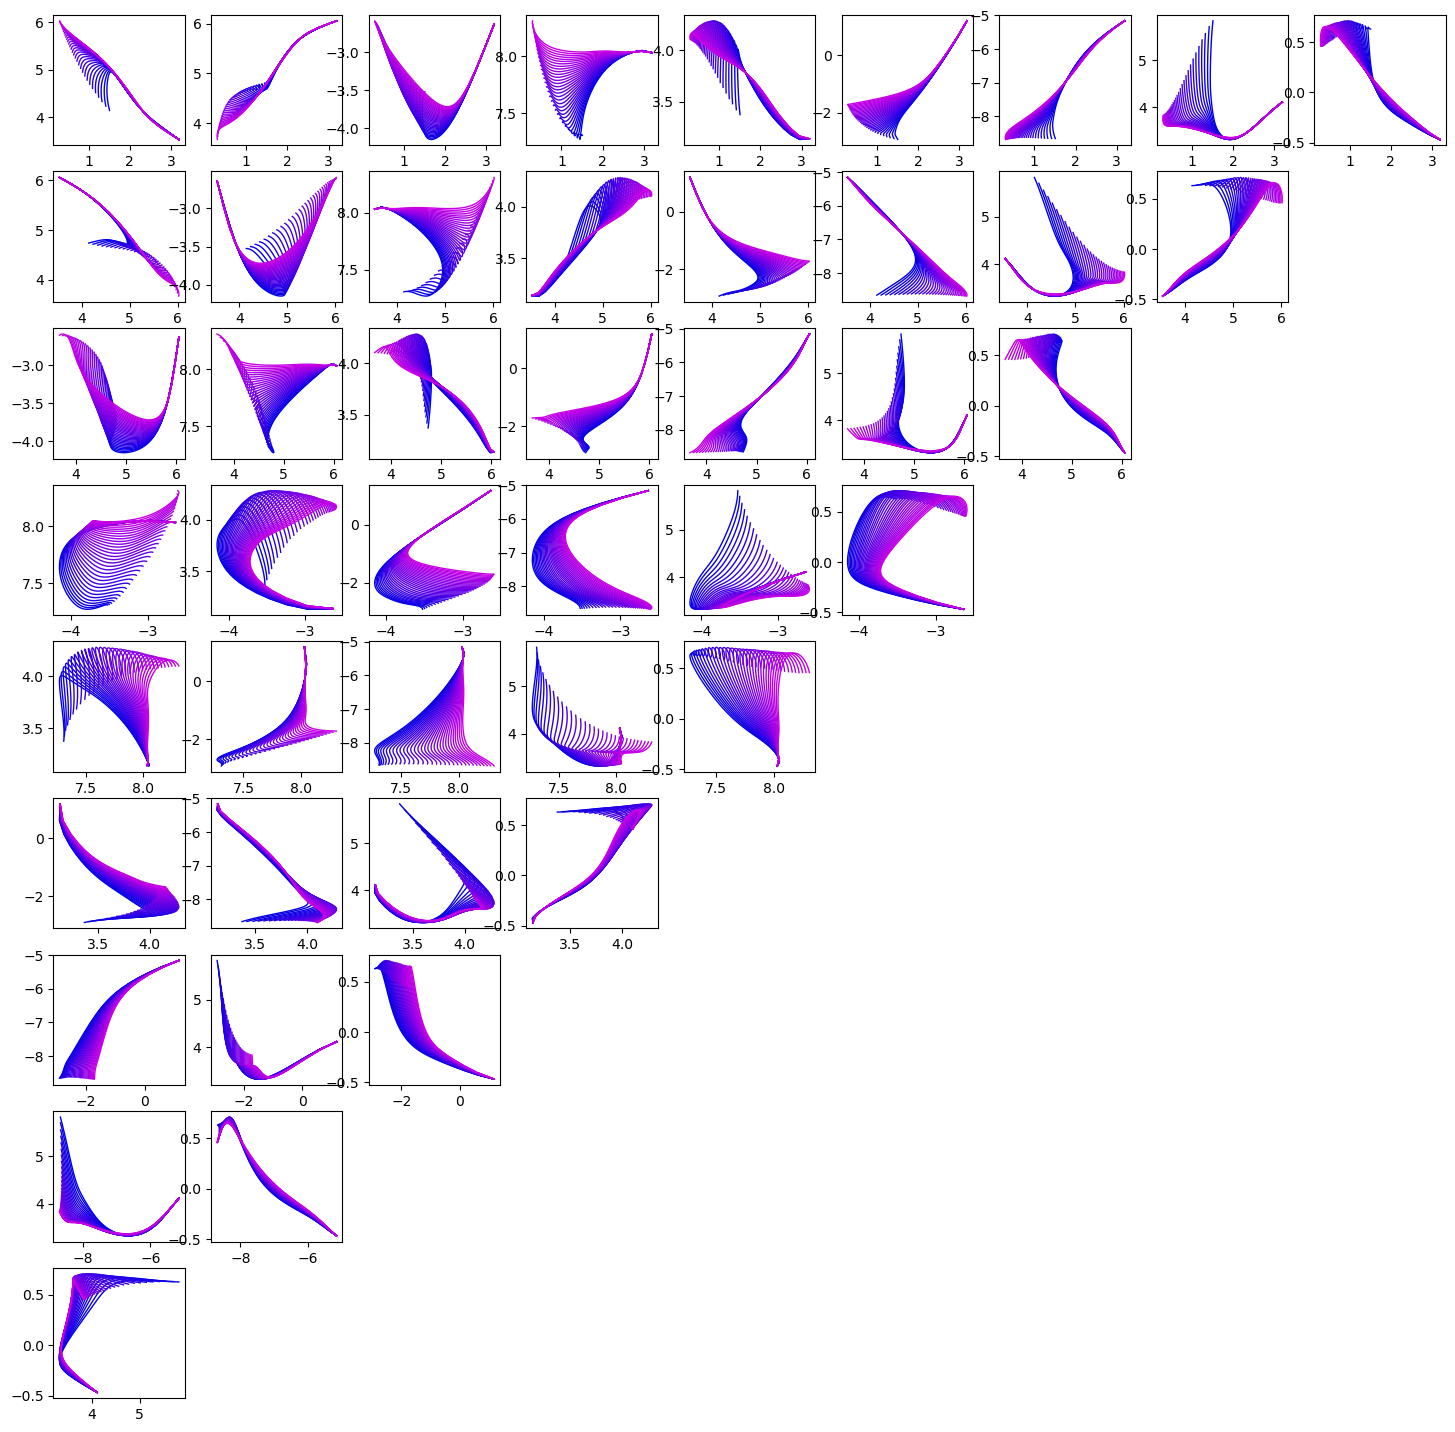

In [66]:
figure(figsize=[20,20])
for d1=1:(D-1)
    for d2=(d1+1):D
        subplot(10,10,d1*9+d2)
        for l=1:10:L
        plot(U_track[d1,end,l,:]',U_track[d2,end,l,:]',lw=1,color=[0.8*l/L,0,0.9]) # take arbitrary 2D projections
        end
    end
end

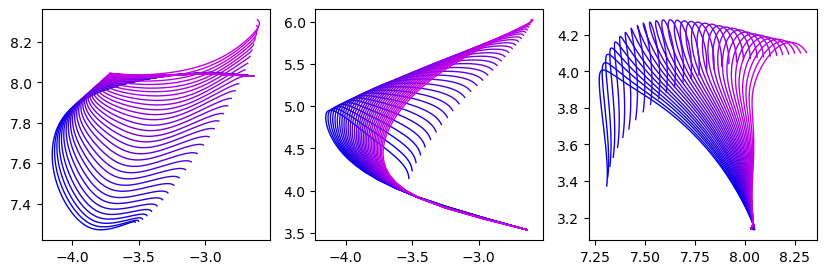

In [69]:
figure(figsize=[10,3])
subplot(131)
for l=1:10:L
    plot(U_track[4,end,l,:]',U_track[5,end,l,:]',lw=1,color=[0.8*l/L,0,0.9]) # take arbitrary 2D projections
end
#axis(false)
subplot(132)
for l=1:10:L
    plot(U_track[4,end,l,:]',U_track[2,end,l,:]',lw=1,color=[0.8*l/L,0,0.9])
end
#axis(false)
subplot(133)
for l=1:10:L
    plot(U_track[5,end,l,:]',U_track[6,end,l,:]',lw=1,color=[0.8*l/L,0,0.9])
end
#axis(false)
#savefig("lipschitz-axes.png",bbox_inches="tight",dpi=150)

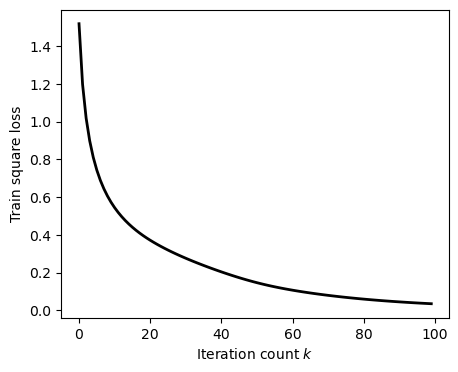

In [42]:
figure(figsize=[5,4])
plot(loss_track,"k",lw=2)
xlabel(L"Iteration count $k$")
ylabel("Train square loss")
#savefig("ref-run-loss.png",bbox_inches="tight",dpi=150)

# Fixed D experiment

In [7]:
# same training set as above (since we make a comparison)

# experimental settings
n_rep= 5
n_L  = 10
n_M  = 10
K = 100 # nb of GD iterations
Ls = Int.(floor.(10 .^ (range(0,2.5,length=n_L))))
Ms = Int.(floor.(10 .^ (range(0,2.5,length=n_M))))
error=zeros(n_L,n_M,n_rep)

@time for i=1:n_L
    @show i
    for j=1:n_M
        for ii = 1:n_rep
            L = Ls[i]
            M = Ms[j]
            U = randn(D,M,L)*sqrt(D)
            V = randn(D,M,L)*sqrt(D)
            (α,η)= (1,1)
            (ηu,ηv) = (D,D)
            for k=1:K
                (U,V) = resnet_GD_step(X,Y,U,V,α,η,ηu=ηu,ηv=ηv)
            end
            H = zeros(D,N,L+1) # forward pass
            H[:,:,1] = X # is a DxN matrix
            for l=1:L # forward pass
                H[:,:,l+1] = H[:,:,l]+ (α/(L*M))*V[:,:,l]*σ.(U[:,:,l]'*H[:,:,l ]/D)
            end
            error[i,j,ii] = sum((H[:,:,end] .- H_ref[:,:,end]).^2)/(D*N)
        end
    end
end

i = 1
i = 2
i = 3
i = 4
i = 5
i = 6
i = 7
i = 8
i = 9
i = 10
235.963247 seconds (255.82 M allocations: 507.445 GiB, 16.13% gc time, 0.02% compilation time)


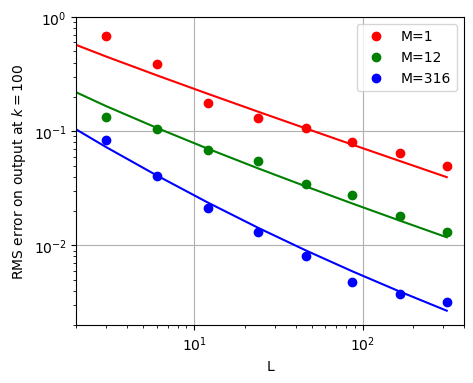

In [37]:
figure(figsize=[5,4])
# fitted trends for K=10

# fitted trends for K=100
loglog(Ls, 0.22*sqrt(D) ./ sqrt.(Ms[1].*Ls) .+ 0.15 ./ Ls ,"r")
loglog(Ls, 0.22*sqrt(D) ./ sqrt.(Ms[5].*Ls) .+ 0.15 ./ Ls ,"g")
loglog(Ls, 0.22*sqrt(D) ./ sqrt.(Ms[end].*Ls) .+ 0.15 ./ Ls ,"b")

loglog(Ls, sqrt.(sum(error[:,1,:],dims=2)/n_rep),"ro",label="M=$(Ms[1])")
loglog(Ls, sqrt.(sum(error[:,5,:],dims=2)/n_rep),"go",label="M=$(Ms[5])")
loglog(Ls, sqrt.(sum(error[:,end,:],dims=2)/n_rep),"bo",label="M=$(Ms[end])")

axis([2,400,0.002,1])
legend()
xlabel("L")
#ylabel(L"RMS error on output at $k=100$")
grid("on")
#savefig("error-vs-L-K100.png",bbox_inches="tight",dpi=150)

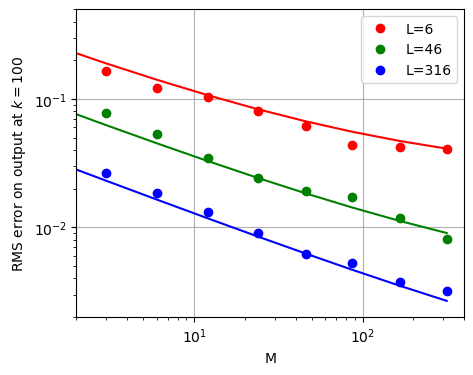

In [39]:
figure(figsize=[5,4])

#loglog(Ms,0.7*sqrt(D) ./ sqrt.(Ms.*Ls[1]) .+ 0.15 ./ Ls[1] ,"r")
loglog(Ms,0.22*sqrt(D) ./ sqrt.(Ms.*Ls[4]) .+ 0.15 ./ Ls[4] ,"r")
loglog(Ms,0.22*sqrt(D) ./ sqrt.(Ms.*Ls[7]) .+ 0.15 ./ Ls[7] ,"g")
loglog(Ms,0.22*sqrt(D) ./ sqrt.(Ms.*Ls[end]) .+ 0.15 ./ Ls[end] ,"b")

#loglog(Ms, sqrt.(sum(error[1,:,:],dims=2)/n_rep),"ro",label="L=$(Ls[1])")
loglog(Ms, sqrt.(sum(error[4,:,:],dims=2)/n_rep),"ro",label="L=$(Ls[4])")
loglog(Ms, sqrt.(sum(error[7,:,:],dims=2)/n_rep),"go",label="L=$(Ls[7])")
loglog(Ms, sqrt.(sum(error[end,:,:],dims=2)/n_rep),"bo",label="L=$(Ls[end])")


axis([2,400,0.002,0.5])
xlabel("M")
legend()
#ylabel(L"RMS error on output at $k=100$")
grid("on")
#savefig("error-vs-M-K100.png",bbox_inches="tight",dpi=150)

# Dimension D dependence experiment

In this cas, instead of doing a reference computation, we compute the variance of the output (more precisely the entrywise standard deviation)

In [71]:
# training set (fixed throughout)
N = 10
L = 1000 
M = 10
K = 50
n_rep = 10
n_D = 3
n_S = 20
Ds = Int.(floor.(10 .^ (range(1,2,length=n_D))))
Ss = 10 .^ (range(-2,2,length=n_S))
 
errs = zeros(n_D,n_S)
loss_track = zeros(K,n_D,n_S)
travel_track=zeros(n_D,n_S)
 for i=1:n_D
     for ii=1:n_S
    @show i,ii
    D = Ds[i]
    σu, σv = (sqrt(D),Ss[ii]*sqrt(D)) # try σv=sqrt(D) and σv=1
    outputs = zeros(D,N,n_rep)
    X = randn(D,N) #training set
    Y = randn(D,N) #training set
    
    for j=1:n_rep

            U = randn(D,M,L)*σu # the scales here are important
            V = randn(D,M,L)*σv 
            U0=U
            (α,η)= (1,1)
            for k=1:K
                (U,V,loss) = resnet_GD_step(X,Y,U,V,α,η,ηu = D*min(1,D/σv^2), ηv=D)
                loss_track[k,i,ii] = loss
            end
            travel_track[i,ii] = sqrt(sum((U .- U0).^2)/(L*M*D))
            H = zeros(D,N,L+1) # forward pass
            H[:,:,1] = X # is a DxN matrix
            for l=1:L # forward pass
                H[:,:,l+1] = H[:,:,l]+ (α/(L*M))*V[:,:,l]*σ.(U[:,:,l]'*H[:,:,l ]/D)
            end

        outputs[:,:,j] = H[:,:,end]

        end
        means = sum(outputs, dims=3)/n_rep
        
    errs[i,ii] = sqrt(sum((outputs .- means).^2)/(D*N*(n_rep-1)))
    end
end

(i, ii) = (1, 1)
(i, ii) = (1, 2)
(i, ii) = (1, 3)
(i, ii) = (1, 4)
(i, ii) = (1, 5)
(i, ii) = (1, 6)
(i, ii) = (1, 7)
(i, ii) = (1, 8)
(i, ii) = (1, 9)
(i, ii) = (1, 10)
(i, ii) = (1, 11)
(i, ii) = (1, 12)
(i, ii) = (1, 13)
(i, ii) = (1, 14)
(i, ii) = (1, 15)
(i, ii) = (1, 16)
(i, ii) = (1, 17)
(i, ii) = (1, 18)
(i, ii) = (1, 19)
(i, ii) = (1, 20)
(i, ii) = (2, 1)
(i, ii) = (2, 2)
(i, ii) = (2, 3)
(i, ii) = (2, 4)
(i, ii) = (2, 5)
(i, ii) = (2, 6)
(i, ii) = (2, 7)
(i, ii) = (2, 8)
(i, ii) = (2, 9)
(i, ii) = (2, 10)
(i, ii) = (2, 11)
(i, ii) = (2, 12)
(i, ii) = (2, 13)
(i, ii) = (2, 14)
(i, ii) = (2, 15)
(i, ii) = (2, 16)
(i, ii) = (2, 17)
(i, ii) = (2, 18)
(i, ii) = (2, 19)
(i, ii) = (2, 20)
(i, ii) = (3, 1)
(i, ii) = (3, 2)
(i, ii) = (3, 3)
(i, ii) = (3, 4)
(i, ii) = (3, 5)
(i, ii) = (3, 6)
(i, ii) = (3, 7)
(i, ii) = (3, 8)
(i, ii) = (3, 9)
(i, ii) = (3, 10)
(i, ii) = (3, 11)
(i, ii) = (3, 12)
(i, ii) = (3, 13)
(i, ii) = (3, 14)
(i, ii) = (3, 15)
(i, ii) = (3, 16)
(i, ii) = (3, 17)
(

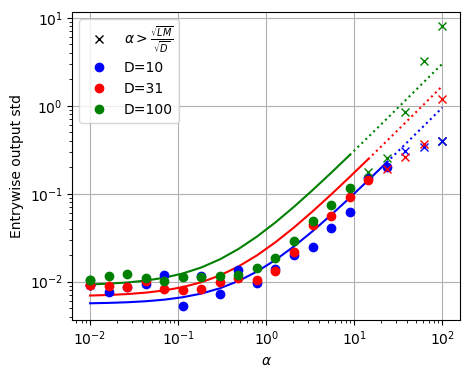

PyObject Text(0.5, 24.0, '$\\alpha$')

In [97]:
figure(figsize=[5,4])
for i=1:n_D
#loglog(Ss,[1.4*(0.2*sqrt.(Ds[i])*Ss[ii]) .* sqrt.(1 ./(L*M)) for ii=1:n_S],color=[i/n_D,i/n_D/2,0.5],label=L"$\sigma_v=\sqrt{D}$")
end
#loglog(Ss, max.(Ss/15, ones(length(Ss))/100))
loglog(Ss[1:end-3], ((0.05 .+ 0.3*Ss[1:end-3]) .* sqrt(Ds[1]) .+ 0.4)/sqrt(L*M),"b")
loglog(Ss[end-3:end], ((0.05 .+ 0.3*Ss[end-3:end]) .* sqrt(Ds[1]) .+ 0.4)/sqrt(L*M),":b")
loglog(Ss[1:end-4], ((0.05 .+ 0.3*Ss[1:end-4]) .* sqrt(Ds[2]) .+ 0.4)/sqrt(L*M),"r")
loglog(Ss[end-4:end], ((0.05 .+ 0.3*Ss[end-4:end]) .* sqrt(Ds[2]) .+ 0.4)/sqrt(L*M),":r")
loglog(Ss[1:end-5], ((0.05 .+ 0.3*Ss[1:end-5]) .* sqrt(Ds[3]) .+ 0.4)/sqrt(L*M),"g")
loglog(Ss[end-5:end], ((0.05 .+ 0.3*Ss[end-5:end]) .* sqrt(Ds[3]) .+ 0.4)/sqrt(L*M),":g")

loglog(Ss[end],errs[1,end],"kx",label=L"\alpha>\frac{\sqrt{LM}}{\sqrt{D}}")
loglog(Ss[1],errs[1,1],"bo",label="D=$(Ds[1])")
for i=1:n_S
    if Ss[i]<sqrt(L*M/Ds[1])
        loglog(Ss[i],errs[1,i],"bo")
    else 
        loglog(Ss[i],errs[1,i],"bx")
    end
end

loglog(Ss[1],errs[2,1],"ro",label="D=$(Ds[2])")
for i=1:n_S
    if Ss[i]<sqrt(L*M/Ds[2])
        loglog(Ss[i],errs[2,i],"ro")
    else 
        loglog(Ss[i],errs[2,i],"rx")
    end
end

loglog(Ss[1],errs[3,1],"go",label="D=$(Ds[3])")
for i=1:n_S
    if Ss[i]<sqrt(L*M/Ds[3])
        loglog(Ss[i],errs[3,i],"go")
    else 
        loglog(Ss[i],errs[3,i],"gx")
    end
end

#loglog(Ss[1:end],errs0[2,1:end],"ro",label="D=$(Ds[2])")
#loglog(Ss[1:end],errs0[3,1:end],"go",label="D=$(Ds[3])")

legend()
grid("on")
ylabel("Entrywise output std")
xlabel(L"\alpha")
# do the plot at K=10 for cleaner output
#savefig("convergenceD-K10.png",bbox_inches="tight",dpi=150)

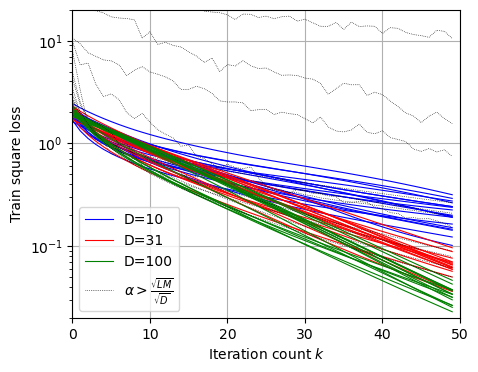

In [95]:
figure(figsize=[5,4])

semilogy(loss_track[:,1,1],color="b",lw=0.8,label="D=$(Ds[1])")
for i=1:n_S
    if Ss[i]<sqrt(L*M/Ds[1])
        semilogy(loss_track[:,1,i],"b",lw=0.8)
    else
        semilogy(loss_track[:,1,i],":k",lw=0.5)
    end
end
semilogy(loss_track[:,2,1],color="r",lw=0.8,label="D=$(Ds[2])")
for i=1:n_S
    if Ss[i]<sqrt(L*M/Ds[2])
        semilogy(loss_track[:,2,i],"r",lw=0.8)
    else
        semilogy(loss_track[:,2,i],":k",lw=0.5)
    end
end

semilogy(loss_track[:,3,1],color="g",lw=0.8,label="D=$(Ds[3])")
semilogy(loss_track[:,3,end],":k",lw=0.5,label=L"\alpha>\frac{\sqrt{LM}}{\sqrt{D}}")
for i=1:n_S
    if Ss[i]<sqrt(L*M/Ds[3])
        semilogy(loss_track[:,3,i],"g",lw=0.8)
    else
        semilogy(loss_track[:,3,i],":k",lw=0.5)
    end
end


xlabel(L"Iteration count $k$")
ylabel("Train square loss")
legend()
grid("on")
axis([0,50,0.02,20])
#savefig("convergence-loss_colors.png",bbox_inches="tight",dpi=150)

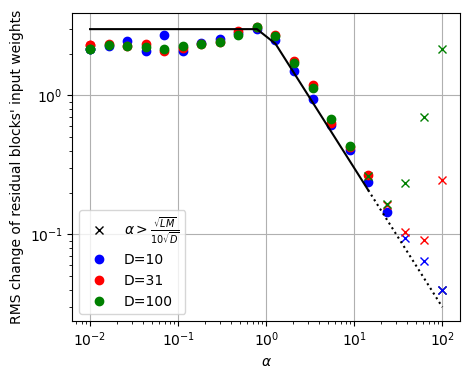

In [93]:
figure(figsize=[5,4])
#plot(travel_track')

loglog(Ss[end],travel_track[1,end],"kx",label=L"\alpha>\frac{\sqrt{LM}}{10\sqrt{D}}")
loglog(Ss[1:1],travel_track[1,1],"bo",label="D=$(Ds[1])")
for i=1:n_S
    if Ss[i]<sqrt(L*M/Ds[1])
        loglog(Ss[i],travel_track[1,i],"bo")
    else
        loglog(Ss[i],travel_track[1,i],"bx")
    end
end

plot(Ss[1],travel_track[2,1],"ro",label="D=$(Ds[2])")
for i=1:n_S
    if Ss[i]<sqrt(L*M/Ds[2])
        loglog(Ss[i],travel_track[2,i],"ro")
    else
        loglog(Ss[i],travel_track[2,i],"rx")
    end
end
plot(Ss[1],travel_track[3,1],"go",label="D=$(Ds[3])")
for i=1:n_S
    if Ss[i]<sqrt(L*M/Ds[3])
        loglog(Ss[i],travel_track[3,i],"go")
    else
        loglog(Ss[i],travel_track[3,i],"gx")
    end
end
plot(Ss[1:16], min.( 3, 3 ./ Ss[1:16]),"k")
plot(Ss[16:end], min.( 3, 3 ./ Ss[16:end]),":k")
#plot(Ss[12:14], 1 ./ (0.18 .+ 0.07*Ss[12:14]),":k")
#vlines(sqrt(L*M/Ds[3]),0.01,1,"g",":")

grid("on")
#yticks([3,4,5,6,7])
legend(loc=3)
xlabel(L"\alpha")
ylabel("RMS change of residual blocks' input weights")
#savefig("lazy-ODE.png",bbox_inches="tight",dpi=150)